# Linear modelling of large corpus of text embedded using OpenAI Ada02, SBERT, and MPNET 

Load data generated in ```./dataClean.ipynb```

In [30]:
import pandas as pd
import numpy as np
fns=['./data/oawiki.csv','./data/sbertDf.csv','./data/mpnetDf.csv']
modelNames=['OpenAI (ada02)','SBERT','MPNet']

openAI=pd.read_csv(fns[0])
openAI['content_vector'] = openAI['content_vector'].apply(lambda x: np.fromstring(x[1:-1], sep=','))

sbert=pd.read_csv(fns[1])
sbert['content_vector'] = sbert['content_vector'].apply(lambda x: np.fromstring(x[1:-1], sep=' '))

mpnet=pd.read_csv(fns[2])
mpnet['content_vector'] = mpnet['content_vector'].apply(lambda x: np.fromstring(x[1:-1], sep=' '))
dfs=[openAI,sbert,mpnet]

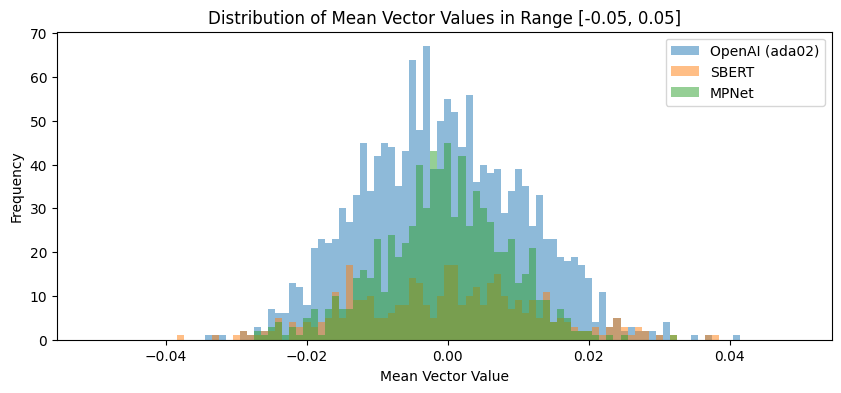

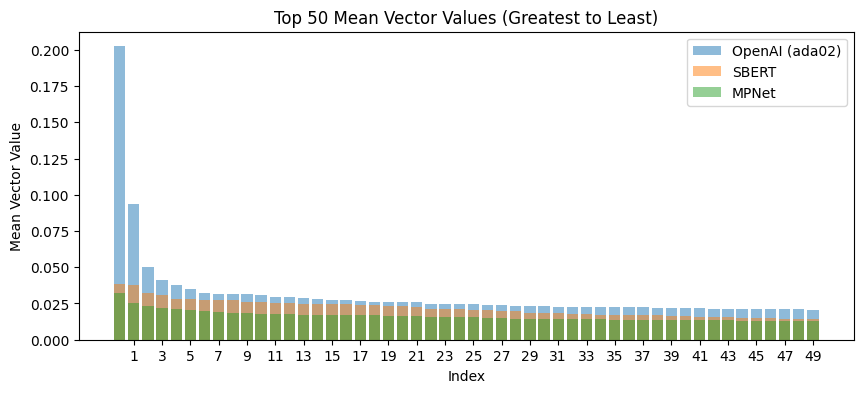

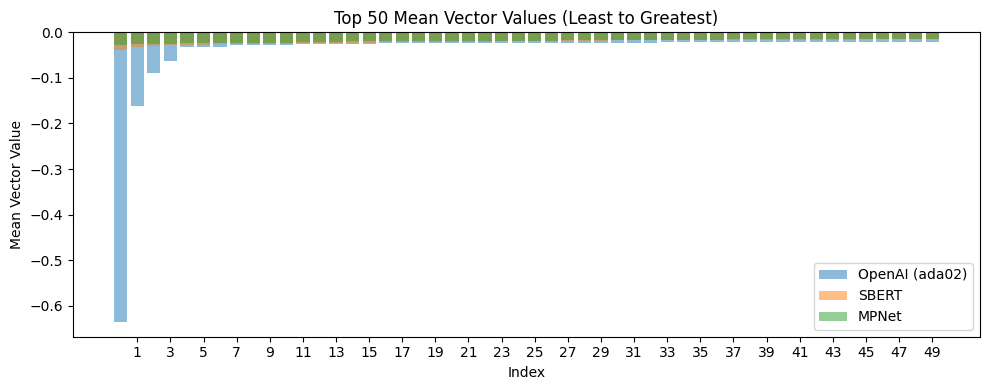

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range and interval for the bar plot
value_range = np.arange(-0.05, 0.051, 0.001)

# Create three separate figures with subplots
fig1, axs1 = plt.subplots(figsize=(10, 4))
fig2, axs2 = plt.subplots(figsize=(10, 4))
fig3, axs3 = plt.subplots(figsize=(10, 4))

for i, df in enumerate(dfs):
    # Create an array of all the vectors
    vectors = np.array(df['content_vector'].tolist())

    # Find the mean of all the vectors
    mean_vector = np.mean(vectors, axis=0)

    # Extract the mean values within the specified range
    mean_values_within_range = [mean_vector[i] for i in range(len(mean_vector)) if -0.05 <= mean_vector[i] <= 0.05]

    # Create a histogram-like bar plot for the mean values within the specified range
    bar_counts, bar_edges = np.histogram(mean_values_within_range, bins=value_range)

    # Plot the bar plot on the first subplot
    axs1.bar(bar_edges[:-1], bar_counts, width=0.001, alpha=0.5, label=modelNames[i])
    axs1.set_title('Distribution of Mean Vector Values in Range [-0.05, 0.05]')
    axs1.set_xlabel("Mean Vector Value")
    axs1.set_ylabel("Frequency")

    # Sort the mean vector indices from greatest to least
    mean_vector_index_sorted_descending = sorted(enumerate(mean_vector), key=lambda x: x[1], reverse=True)

    # Extract the top 100 mean values and their corresponding indices
    top_100_mean_values_descending = [x[1] for x in mean_vector_index_sorted_descending[:50]]
    top_100_indices_descending = [x[0] for x in mean_vector_index_sorted_descending[:50]]

    # Plot the top 100 mean values in a bar graph (greatest to least) on the second subplot
    axs2.bar(range(50), top_100_mean_values_descending, alpha=0.5, label=modelNames[i])
    axs2.set_title('Top 50 Mean Vector Values (Greatest to Least)')
    axs2.set_xlabel("Index")
    axs2.set_ylabel("Mean Vector Value")
    axs2.set_xticks(range(1,51)[0::2])  # Set x-axis ticks without labels

    # Sort the mean vector indices from least to greatest
    mean_vector_index_sorted_ascending = sorted(enumerate(mean_vector), key=lambda x: x[1])

    # Extract the top 100 mean values and their corresponding indices
    top_100_mean_values_ascending = [x[1] for x in mean_vector_index_sorted_ascending[:50]]
    top_100_indices_ascending = [x[0] for x in mean_vector_index_sorted_ascending[:50]]

    # Plot the top 100 mean values in a bar graph (least to greatest) on the third subplot
    axs3.bar(range(50), top_100_mean_values_ascending, alpha=0.5, label=modelNames[i])
    axs3.set_title('Top 50 Mean Vector Values (Least to Greatest)')
    axs3.set_xlabel("Index")
    axs3.set_ylabel("Mean Vector Value")
    axs3.set_xticks(range(1,51)[0::2])  # Set x-axis ticks without labels

# Add a legend to distinguish between models
axs1.legend()
axs2.legend()
axs3.legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


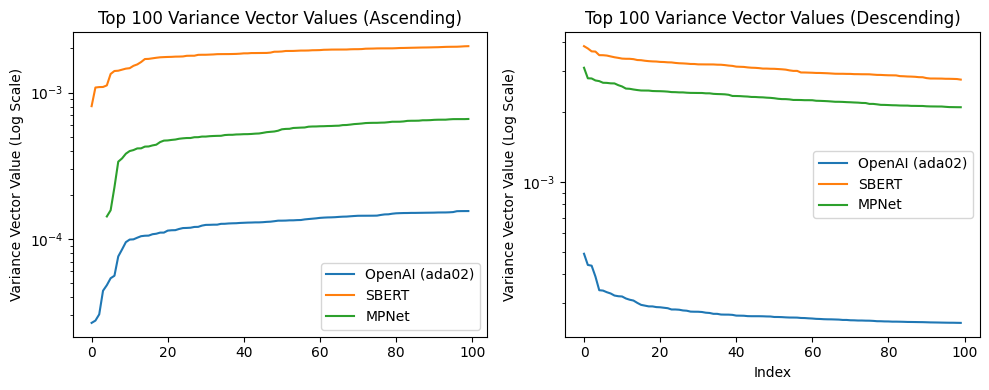

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Create a 2x1 subplot
fig, axes = plt.subplots(1, 2,figsize=(10, 4))

# Assuming dfs is a list of DataFrames and modelNames is a list of model names
for i, df in enumerate(dfs[0:3]):
    # Assuming each DataFrame has a column 'content_vector' containing the vectors
    vectors = np.array(df['content_vector'].tolist())

    # Calculate the variance of all the vectors
    variance_vector = np.var(vectors, axis=0)

    # Label each position of the variance vector with its corresponding index
    variance_vector_index = [(j, variance_vector[j]) for j in range(len(variance_vector))]

    # Sort the variance vector indices from least to greatest and greatest to least
    variance_vector_index_sorted_ascending = sorted(variance_vector_index, key=lambda x: x[1])
    variance_vector_index_sorted_descending = sorted(variance_vector_index, key=lambda x: x[1], reverse=True)

    # Extract the top 100 variance values and their corresponding indices
    top_100_variance_values_ascending = [x[1] for x in variance_vector_index_sorted_ascending[:100]]
    top_100_variance_values_descending = [x[1] for x in variance_vector_index_sorted_descending[:100]]
    top_100_indices_ascending = [x[0] for x in variance_vector_index_sorted_ascending[:100]]
    top_100_indices_descending = [x[0] for x in variance_vector_index_sorted_descending[:100]]
    
    # Drop any values that are less than 10e-8 and set to NaN
    top_100_variance_values_ascending = np.array(top_100_variance_values_ascending)
    top_100_variance_values_descending = np.array(top_100_variance_values_descending)
    top_100_variance_values_ascending[top_100_variance_values_ascending < 10e-8] = np.nan
    top_100_variance_values_descending[top_100_variance_values_descending < 10e-8] = np.nan

    # Plot the top 100 variance values (ascending order) on the first subplot
    axes[0].plot(range(100), top_100_variance_values_ascending, label=f'{modelNames[i]}')
    axes[0].set_ylabel("Variance Vector Value (Log Scale)")
    axes[0].set_yscale('log')

    # Plot the top 100 variance values (descending order) on the second subplot
    axes[1].plot(range(100), top_100_variance_values_descending, label=f'{modelNames[i]}')
    axes[1].set_xlabel("Index")
    axes[1].set_ylabel("Variance Vector Value (Log Scale)")
    axes[1].set_yscale('log')

# Set titles and legends for both subplots
axes[0].set_title("Top 100 Variance Vector Values (Ascending)")
axes[0].legend()
axes[1].set_title("Top 100 Variance Vector Values (Descending)")
axes[1].legend()

# Adjust subplot spacing
plt.tight_layout()

# Show the plot
plt.show()
